In [6]:
!pip install dtw
!pip install fastdtw
!pip install pydtw
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display
from IPython.display import Image
from fastdtw import fastdtw
from dtw import dtw as dtw2
from pydtw import dtw1d
from scipy.spatial.distance import euclidean


def maindtw(test: list, sample: list):
    global a
    global b
    global p
    d=dtwa(test,sample)
    print(d.sizeTest,d.sizeTemplate)
    dist,backP=d.warp(test,sample)
    path=d.path(backP)
    plot_path(path)
    return(dist,path)

class dtwa():
    def __init__(self,test:list,template:list):
        self.test=np.array(test)
        self.sizeTest=(self.test).shape[0]
        """number of frames """
        self.template=np.array(template)
        self.sizeTemplate=(self.template.shape)[0]
        self.sizeMfcc=len(test[0]); """the size of a mfcc vector"""
        
        self.globalDistance=[]
        self.backPointer=[]
        
        
    def localDistance(self,mfcc1:list, mfcc2:list):
      #this is the distance between two points, in our case each point is an mfcc vector
       s=0
       assert(len(mfcc1)==len(mfcc2))
       for i in range(self.sizeMfcc):
           s+=np.abs(mfcc1[i]-mfcc2[i])
           
       return(s/len(mfcc1))

            
        
    def warp(self,test:list,template:list):
        test=np.array(test)
        template=np.array(template)
        backPointer=[]
        globalDistance=[]
        """...."""
    
        
        """ We initialize the matrices of the distance (globalDistance) and the matrice of the closest neighbour to every point backPointer"""
        for i in range(self.sizeTest):
                column=[]
                colonne=[]
                for j in range(self.sizeTemplate):
                        
                        column.append(float("inf"))
                        colonne.append((None,None))
                       
                        
                globalDistance.append(column)
                backPointer.append(colonne)
                        
                        
        """Now we start warping"""
        
        for i in range(self.sizeTest):
                for j in range(self.sizeTemplate):
                    if (i==0 ) and (j==0):
                        globalDistance[i][j]=self.localDistance(test[i],template[j])
                        backPointer[i][j]=(None,None)
                        
                        
                    elif(i==0):
                        globalDistance[i][j]=globalDistance[i][j-1]+self.localDistance(test[i],template[j])
                        backPointer[i][j]=(i,j-1)
                        
                    elif(j==0):
                        globalDistance[i][j]=globalDistance[i-1][j]+self.localDistance(test[i],template[j])
                        backPointer[i][j]=(i-1,j)
                    else:
                      
                         
                        lowest_global_distance = globalDistance[i-1][j-1]
                        backPointer[i][j] = (i-1,j-1)
                        
                        if globalDistance[i][j-1] < lowest_global_distance:
                                lowest_global_distance = globalDistance[i][j-1]
                                backPointer[i][j] = (i,j-1)
                        if globalDistance[i-1][j] < lowest_global_distance:
                                lowest_global_distance = globalDistance[i-1][j]
                                backPointer[i][j] = (i-1,j)
                        globalDistance[i][j] = lowest_global_distance + self.localDistance(test[i],template[j] )                                
                            
                        
 
 
        distance=globalDistance[-1][-1]        
        #We return only the distance
        return(distance,backPointer)
        
    def path(self,backPointer):
            """returns the warping path """
            path=[(self.sizeTest-1,self.sizeTemplate-1)]
            pointer=backPointer[self.sizeTest-1][self.sizeTemplate-1]
            while(pointer!=(None,None)):
                path.append(pointer)
                pointer=backPointer[pointer[0]][pointer[1]]
            #we inverse the path
            path=path[::-1]   
            return(path)

def plot_path(path:list):

        path_x=[p[0] for p in path]
        path_y=[p[1] for p in path]

        plt.plot(path_x,path_y,marker='.', color='k', linestyle='none')
        plt.show()
            
            
            
            
                
            
            
                            
                            
                        
                        
                     

#We benchmark our algorithm against another found on github:

We can see that they give the same path, we couldnt figure out why the distance is different, 
it's probably due to a normalisation constant.

0.08363935536238105
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 11, 12, 13, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 24, 24]), array([ 0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 10, 11, 12, 12, 13, 13, 14, 15, 16, 17, 18, 19]))


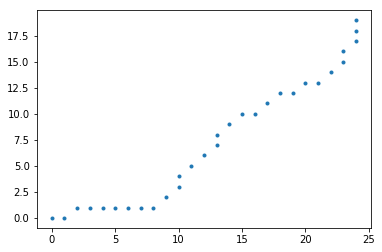

25 20


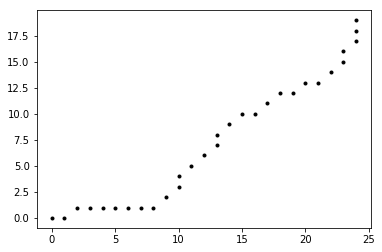

[1.8818855]


In [9]:
import numpy as np

# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
x = np.random.rand(25).reshape(-1, 1)
y = np.random.rand(20).reshape(-1, 1)

from dtw import dtw 
euclidean_norm = lambda x, y: np.abs(x - y)

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

print(d)
print(path)
plt.plot(path[0],path[1],marker='.',linestyle='none')
plt.show()

a=[[i,0] for i in x]
b=[[i,0] for i in y]

d,p=maindtw(a,b)
print(d)
